<a href="https://pandas.pydata.org/docs/user_guide/visualization.html"><h1>Visualisations - Pandas Docs</h1></a>
Click to open the docs for reference in a new tab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Plotting (Lines)

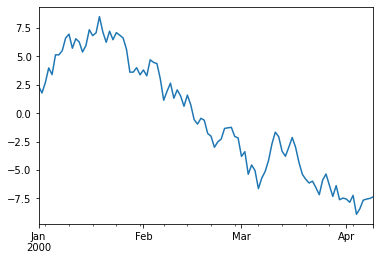

In [2]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

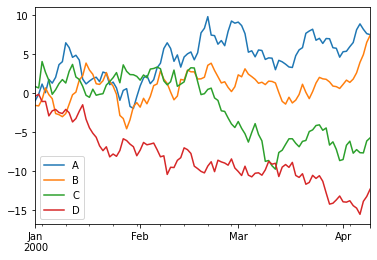

In [3]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()

df.plot()

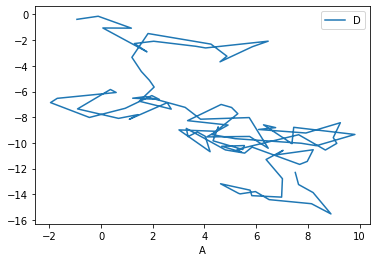

In [4]:
df.plot(x='A', y='D')

# 2. Bar Plots 

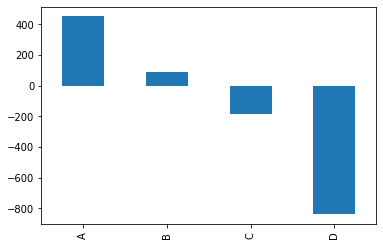

In [5]:
df.sum().plot.bar() #plotting a bar chart of the totals for each column

## Multiple bar plot (default)

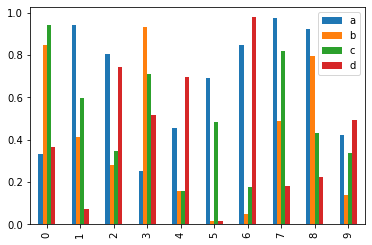

In [6]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

## Stacked bar plots

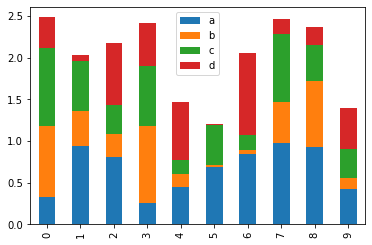

In [7]:
df2.plot.bar(stacked=True)

## Horizontal bar plots

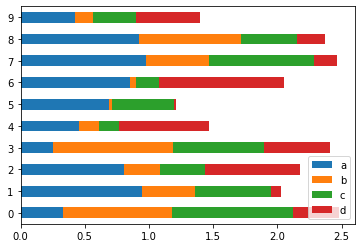

In [8]:
df2.plot.barh(stacked=True)

# 3. Histograms

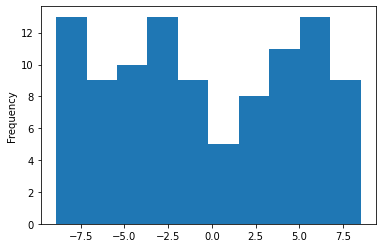

In [9]:
ts.plot.hist()

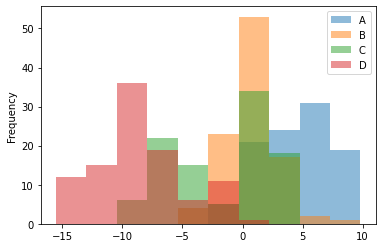

In [10]:
df.plot.hist(alpha=0.5)

## Stacked histograms

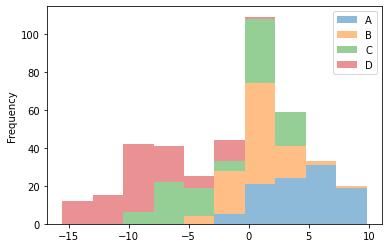

In [11]:
df.plot.hist(stacked=True, alpha=0.5)

## Cumulative histograms

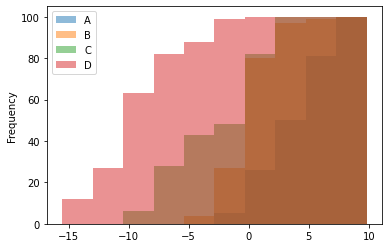

In [12]:
df.plot.hist(cumulative=True, alpha=0.5)

## Horizontal histograms

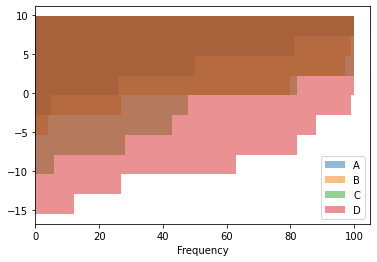

In [13]:
df.plot.hist(cumulative=True, orientation='horizontal', alpha=0.5)

## Multiple histogram subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a996bb38>,
      dtype=object)

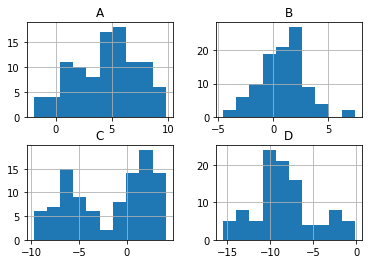

In [14]:
df.hist()

# 4. Box  plots

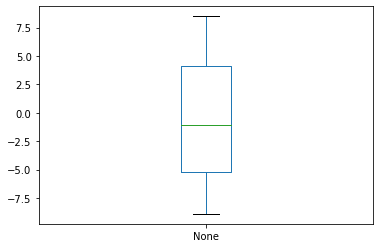

In [15]:
ts.plot.box()

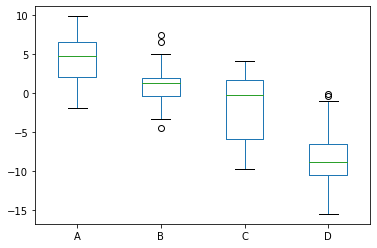

In [16]:
df.plot.box()

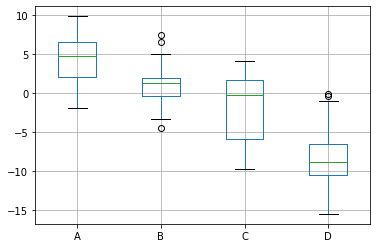

In [17]:
df.boxplot()

## Horizontal boxplots

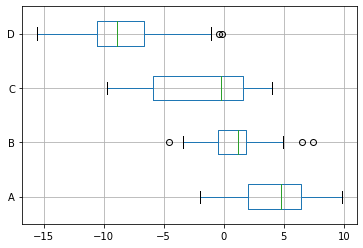

In [18]:
df.boxplot(vert=False)

# 5. Area plots

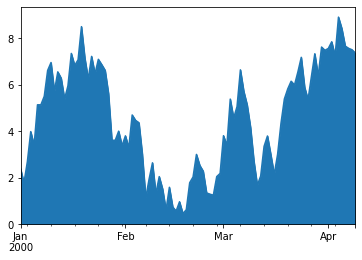

In [19]:
ts.abs().plot.area() # absolute values are used since for stacked area plots all values must be either +ve or -ve

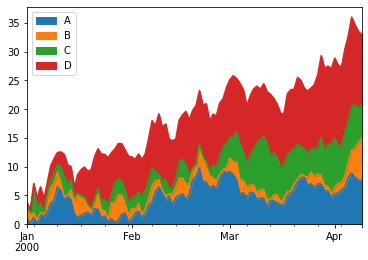

In [20]:
df.abs().plot.area()

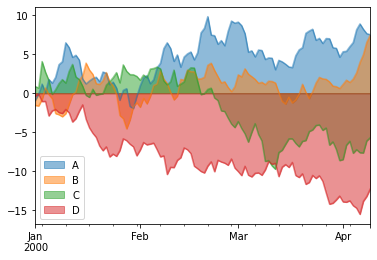

In [21]:
df.plot.area(stacked=False)

# 6. Scatter plots

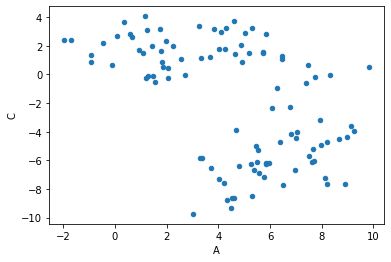

In [22]:
df.plot.scatter(x='A', y='C')

## Multiple column groups in same axes

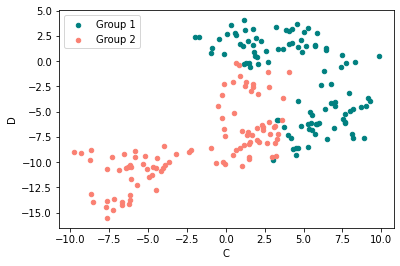

In [23]:
ax = df.plot.scatter(x='A', y='C', color='teal', label='Group 1');

df.plot.scatter(x='C', y='D', color='salmon', label='Group 2', ax=ax);

## Color scaling the points using a column

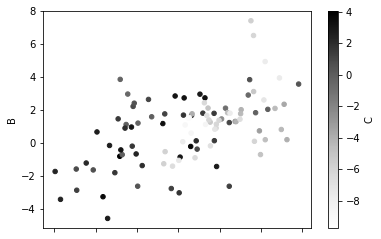

In [24]:
df.plot.scatter(x='A', y='B', c='C')

## Setting bubble size

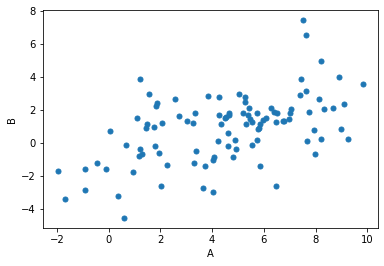

In [25]:
df.plot.scatter(x='A', y='B', s=25)

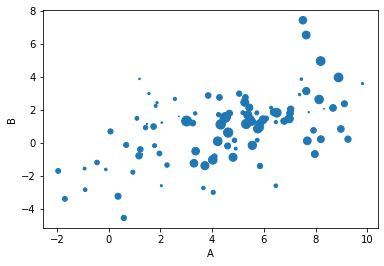

In [26]:
# using column C
df.plot.scatter(x='A', y='B', s=df['C'].abs()*10)

# 7. Hexagonal bin plots

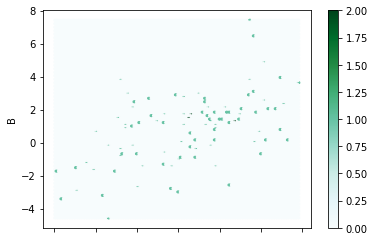

In [27]:
df.plot.hexbin(x='A', y='B')

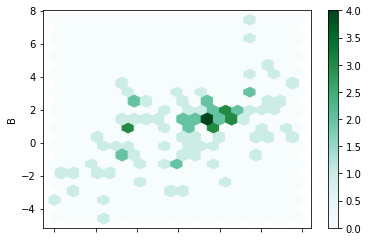

In [28]:
df.plot.hexbin(x='A', y='B', gridsize=20)

## Specifying alternate aggregating functions

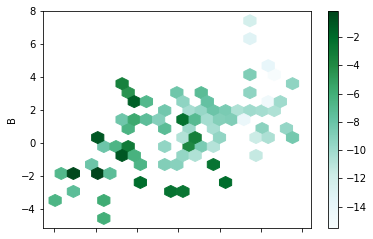

In [29]:
df.plot.hexbin(x='A', y='B', C='D', reduce_C_function=np.max, gridsize=20) # others include min, sum, mean, ...

# 8. Pie plots

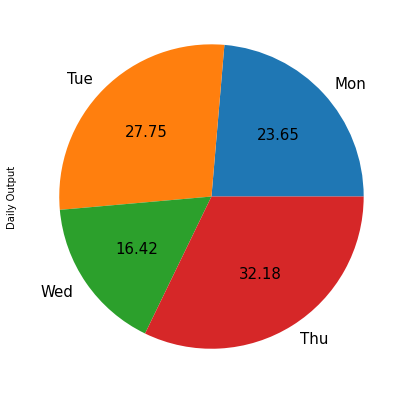

In [30]:
series = pd.Series([144, 169, 100, 196], index=['Mon', 'Tue', 'Wed', 'Thu'], name='Daily Output')

series.plot.pie(figsize=(7, 7), autopct='%.2f', fontsize=15)

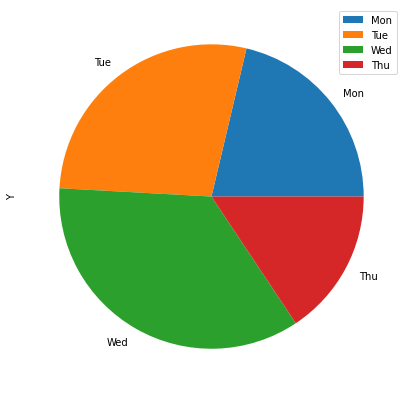

In [31]:
df2 = pd.DataFrame({ 'X':[144, 169, 100, 196], 'Y':[49, 64, 81, 36]}, index=['Mon', 'Tue', 'Wed', 'Thu'])

df2.plot.pie(y='Y', figsize=(7,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a8e59e48>,
      dtype=object)

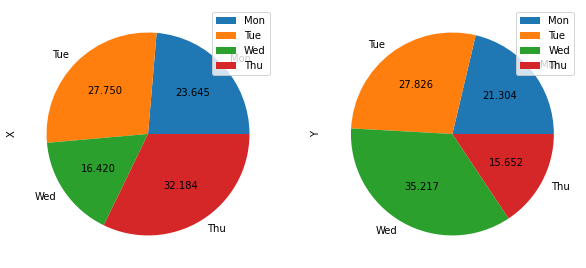

In [32]:
df2.plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

> **Note:** If you pass values whose sum total is less than 1.0, matplotlib draws an incomplete circle.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a8da46a0>,
      dtype=object)

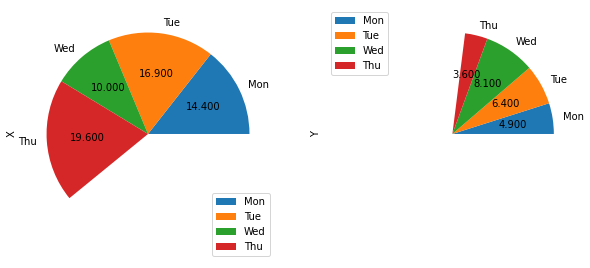

In [33]:
(df2/1000).plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

# 9. Handling Missing Data
Missing values are dropped, left out, or filled depending on the plot type.

In [34]:
pd.read_html('https://pandas.pydata.org/docs/user_guide/visualization.html')[1]

,Plot Type,NaN Handling
0,Line,Leave gaps at NaNs
1,Line (stacked),Fill 0’s
2,Bar,Fill 0’s
3,Scatter,Drop NaNs
4,Histogram,Drop NaNs (column-wise)
5,Box,Drop NaNs (column-wise)
6,Area,Fill 0’s
7,KDE,Drop NaNs (column-wise)
8,Hexbin,Drop NaNs
9,Pie,Fill 0’s


# 10. Plotting Tools
These functions can be imported from pandas.plotting and take a `Series` or `DataFrame` as an argument.

## 10.1 Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a77fbb70>,
      dtype=object)

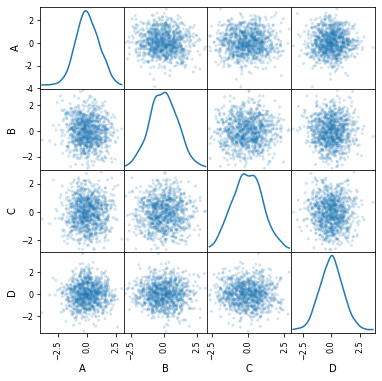

In [35]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a8e73c18>,
      dtype=object)

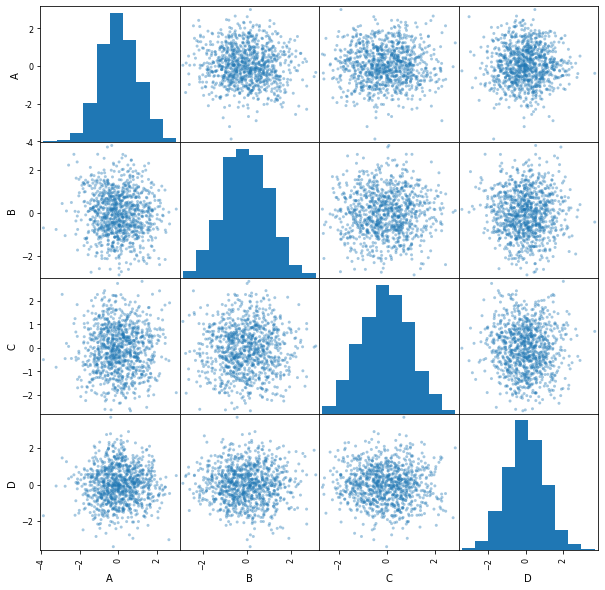

In [36]:
scatter_matrix(df, alpha=0.4, figsize=(10,10), diagonal='hist')

## 10.2 Density Plot

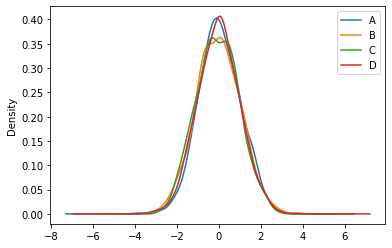

In [37]:
df.plot.kde()

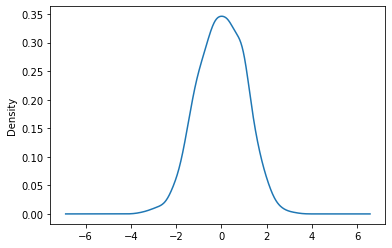

In [38]:
s = pd.Series(np.random.randn(1000))

s.plot.kde()

## 10.3 Andrew Curves

In [39]:
from pandas.plotting import andrews_curves

# fetching iris data
columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm',
         'petal width in cm', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
       header=None, names=columns)
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


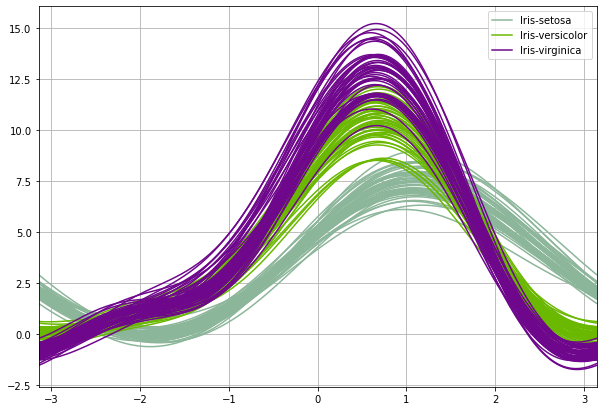

In [40]:
plt.figure(figsize=(10,7))
andrews_curves(data, 'class')

## 10.4 Parallel Coordinates

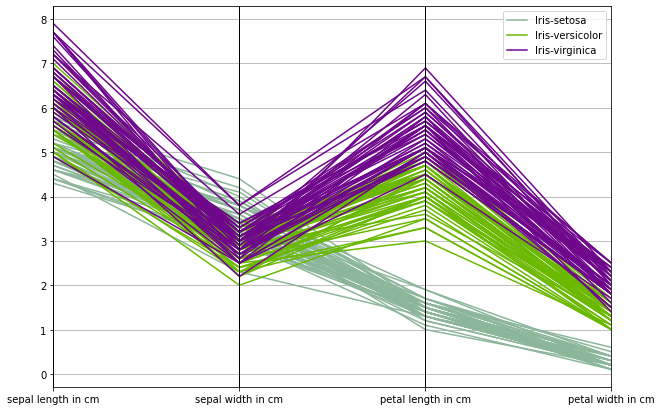

In [41]:
from pandas.plotting import parallel_coordinates

# using the iris data
plt.figure(figsize=(10,7))
parallel_coordinates(data, 'class')

## 10.5 Lag Plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot.

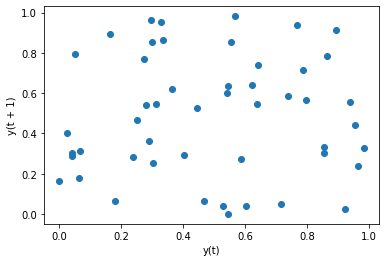

In [42]:
from pandas.plotting import lag_plot

s = pd.Series(np.random.rand(50))
lag_plot(s)

## 10.6 Autocorrelation Plots

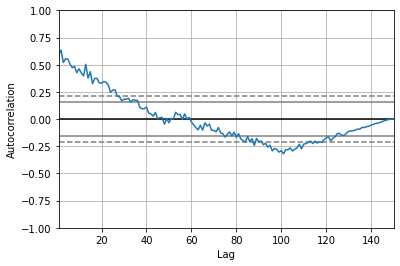

In [43]:
from pandas.plotting import autocorrelation_plot

# using the iris data
s = pd.Series(data['sepal length in cm'])
autocorrelation_plot(s)

In [44]:
data['sepal length in cm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length in cm, Length: 150, dtype: float64

## 10.7 Bootstrap Plot

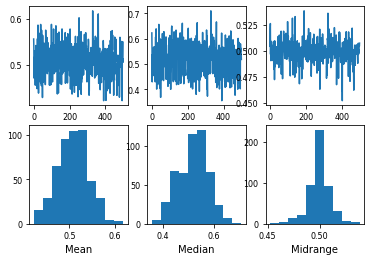

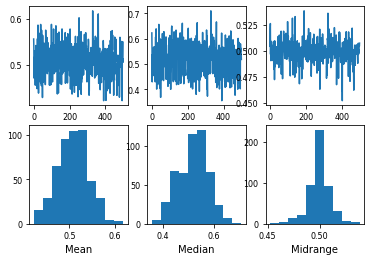

In [45]:
from pandas.plotting import bootstrap_plot

s = pd.Series(np.random.rand(1000))
bootstrap_plot(s, size=70)

## 10.8 RadViz

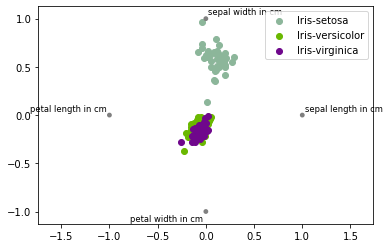

In [46]:
from pandas.plotting import radviz

# using the iris data
radviz(data, 'class')

# 11. Plot Formatting